<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

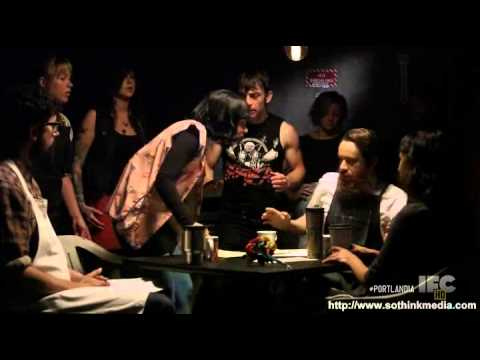

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/dliu/projects/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [53]:
import pandas as pd
# Base
from collections import Counter
import re
import numpy as np
import pandas as pd
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
nlp = spacy.load("en_core_web_lg")
path = "data/yelp_coffeeshop_review_data.csv"
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/dliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [176]:
# Start here 
def clean_text(X):
    """ 
        X: series
        
        return: np.array
    """
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    number = re.compile('[0-9]+\s')  #remove freestanding numbers

    
    X = X.map(lambda t : BeautifulSoup(t, "lxml").text) # strip html tags
    X = X.map(lambda t : t.lower()) # lowercase text
    X = X.map(lambda t : REPLACE_BY_SPACE_RE.sub(' ', t))  # symbols by space in text
    X = X.map(lambda t : BAD_SYMBOLS_RE.sub('', t)) # delete symbols which are in BAD_SYMBOLS_RE
    X = X.map(lambda t : number.sub('', t))         # remove groups of digits
    X = X.map(lambda t : ' '.join(word for word in t.split() if word not in STOPWORDS))# delete stopwords
    return np.array(X)

In [55]:
def wrangle():
    shops['tokens'] = clean_text(shops.full_review_text)
    shops['rating'] = shops['star_rating'].str.slice(1,2).astype('int')  # extract int portion of rating
    shops['label'] = shops.rating.apply(lambda x : 'good' if x >=4 else 'bad')


In [56]:
shops = pd.read_csv(path)
shops.head()
wrangle()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [85]:
print(f"Total token count : {shops['tokens'].apply(lambda x: len(x.split(' '))).sum()} ")
print(f"\nclass distribution :\n {shops.label.value_counts(normalize=True)} ...is pretty skewed\n")
print(f"median rating overall : {shops.rating.median()} seems pretty high")
print(f"mean rating overall : {shops.rating.mean()} is also high, Austin has great coffee shops\n") 

print(shops.groupby(['coffee_shop_name']).count().rating.sort_values(ascending=False).head(5))
shops.groupby(['coffee_shop_name','rating']).count()


Total token count : 410220 

class distribution :
 good    0.806197
bad     0.193803
Name: label, dtype: float64 ...is pretty skewed

median rating overall : 4.0 seems pretty high
mean rating overall : 4.169117647058823 is also high, Austin has great coffee shops

coffee_shop_name
Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Venezia Italian Gelato             200
Houndstooth Coffee                 200
Name: rating, dtype: int64


full_review_text  star_rating  tokens  label
coffee_shop_name      rating                                              
Alta’s Cafe           1                      9            9       9      9
                      2                      5            5       5      5
                      3                      9            9       9      9
                      4                     38           38      38     38
                      5                     39           39      39     39
...                                        ...          ...     ...    ...
Vintage Heart Coffee  1                      2            2       2      2
                      2                      3            3       3      3
                      3                     12           12      12     12
                      4                     42           42      42     42
                      5                     41           41      41     41

[358 rows x 4 columns]

good    0.806197
bad     0.193803
Name: label, dtype: float64

In [94]:
goodshops = shops.label == 'good'
badshops = shops.label == 'bad'

goodwords = shops[goodshops]['tokens'].apply(lambda x: (x.split(' ')))
badwords = shops[badshops]['tokens'].apply(lambda x: (x.split(' ')))

In [156]:
badlist = [st for row in badwords for st in row]
goodlist = [st for row in goodwords for st in row]

bad_counter = Counter(badlist)     # ..annoying.. returns a list of tuples. its simple to do this with counter but since i want to plot it seems 
                                    # like it could just be done in pandas .. 
good_counter = Counter(goodlist)

In [157]:
df = pd.DataFrame(good_counter.most_common(), columns= ['word', 'goodcount']).set_index('word')

In [160]:
df = pd.concat([df, pd.DataFrame(bad_counter.most_common(),columns= ['word', 'badcount']).set_index('word')] ,axis=1, join='outer')
normed_counts = (df- df.mean())/df.std()     # normalize the column values to show counts in std

In [161]:
df['delta'] = (df.goodcount - df.badcount).abs()    #find the difference 

In [162]:
df.sort_values('delta',ascending=False).head(10)


,goodcount,badcount,delta
coffee,8302.0,2139.0,6163.0
place,4311.0,1113.0,3198.0
great,3449.0,466.0,2983.0
good,3097.0,879.0,2218.0
austin,1970.0,283.0,1687.0
love,1727.0,210.0,1517.0
also,1702.0,306.0,1396.0
like,2213.0,877.0,1336.0
really,1816.0,502.0,1314.0
get,1866.0,562.0,1304.0


In [166]:
normed_counts['delta'] = (normed_counts.goodcount - normed_counts.badcount).abs()    #find the difference 

In [169]:
normed_counts.head(5)

,goodcount,badcount,delta
coffee,71.349443,50.328525,21.020918
place,36.971564,26.072919,10.898645
great,29.546425,10.777230,18.769195
good,26.514349,20.540939,5.973411
like,18.899705,20.493657,1.593952


/home/dliu/.conda/envs/U4-S1-NLP/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


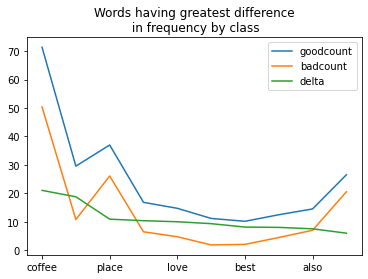

In [175]:
normed_counts.sort_values('delta', ascending=False).head(10).plot(title="Words having greatest difference\n in frequency by class")
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

